# Books per Category
- The aim of this notebook is to scrape all relevant data from books.toscrape.com to see how many books they offer per category

In [151]:
from bs4 import BeautifulSoup
import requests

## Loading, extracting and parsing html

In [152]:
#Downloading the data with requsts.get()
data = requests.get('http://books.toscrape.com/catalogue/category/books_1/index.html')
#Getting the plain text
html = data.text
#Parsing the data w/ BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
#Shorter: soup = BeautifulSoup(data.text, 'html.parser')

In [153]:
#Having a look at the data, just showing the first 101 elements of the string object prettify returns
print(soup.prettify()[0:100])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![end


## Defining data needed | Website & Link Structure
- for our analysis we need the category names and the number of books per category
- we have to access every category 'frontpage' one after another to get the number of results shown there
- when looking at the link structure one can see that they start with http://books.toscrape.com/catalogue/category/books_1/index.html
- then for the first category you have 
http://books.toscrape.com/catalogue/category/books/travel_2/index.html
- and so on: http://books.toscrape.com/catalogue/category/books/mystery_3/index.html 
- so it appears to be the fact that after /category you have the name of the category, followed by an underscore and a consecutive numer

## Plan: 
- use homepage to extract category names | Update: Used an external text file for category names
- use category names to automatically build the links for the categories 
- visit every category page and extract the number of books they have
- Analysis

## Getting Category Names

In [245]:
#as we already have the home-page, after inspecting I see all links/category names are stored in a <li> tag 
links = soup.find_all('li')

In [246]:
#Empty list for text insinde the <li> tag
li_text = []
#Iterate trough the links, extract only the text and append to the emtpy list
for i in links:
    li_text.append(i.text.strip())
#This seemed to be fine but after the third element (when trying to access [0:3] it all fucks up due to \n)
li_text[0:2]

['Home', 'Books']

In [247]:
#As this doesn't work out I'll move on to my - let's say - a bit cheating method
#li_text.remove('n')

## Refresher: Reading in Files

In [248]:
#I just copy pasted the List names into a txt file and will read that in 
categories = open('categories.txt', 'r')

In [249]:
#If you were to store this in a variable for later transformation, this variable would be of type str
categories = categories.read()
categories

'Books\nTravel\nMystery\nHistorical Fiction\nSequential Art\nClassics\nPhilosophy\nRomance\nWomens Fiction\nFiction\nChildrens\nReligion\nNonfiction\nMusic\nDefault\nScience Fiction\nSports and Games\nAdd a comment\nFantasy\nNew Adult\nYoung Adult\nScience\nPoetry\nParanormal\nArt\nPsychology\nAutobiography\nParenting\nAdult Fiction\nHumor\nHorror\nHistory\nFood and Drink\nChristian Fiction\nBusiness\nBiography\nThriller\nContemporary\nSpirituality\nAcademic\nSelf Help\nHistorical\nChristian\nSuspense\nShort Stories\nNovels\nHealth\nPolitics\nCultural\nErotica\nCrime'

In [250]:
#Another Solution for doing this in a more elegant way
#This returns a list
with open('categories.txt') as f:
    categories_list = f.readlines()
#Get first 6 elements of the list
categories_list[0:5]

['Books\n',
 'Travel\n',
 'Mystery\n',
 'Historical Fiction\n',
 'Sequential Art\n']

In [251]:
#in both cases we have these annoying \n tags due to my storage of the categories in the file
#When we do split we remove these and automatically get a list of categories
categories = categories.split('\n')

In [252]:
#Also have to lowercase them as link doesn't work with uppercase letters, need a loop as 
#'list' object has no attribute 'lower'
categories= [i.lower() for i in categories]

In [253]:
#Check how many categories we have to loop through
len(categories)

51

## Using Category Names to Generate the Links
- what's nice now: We can iterate over the list with a loop from 1 to 50 (or as many elements are in the categories list) **and** can use the same iterator for generating the number in the link (should be iterator plus 1 as index page is 1 and first Category 'Travel' is 2)
- I'll get a problem whith all Categories >1 word of which there are 'Historical Fiction', 'Sequential Art', 'Womens Fiction', 'Science Fiction', 'Sports and Games', 'Add a comment', 'New Adult', 'Young Adult', 'Adult Fiction', 'Food and Drink', 'Chrisitan Fiction' & 'Short Stories'
- First thought of hard coding the exceptions but as there are 12 of them I'll do a check whether string is longer than 1 I guess and if so dilimit the single words with an underscore
- link structure: **http://books.toscrape.com/catalogue/category/books/[categoryName]_[numbers1-51]/index.html**

In [254]:
#Just for testing: Adding a consecutive number to a string 
print(['ABC'+str(x) for x in range(1,52)])

['ABC1', 'ABC2', 'ABC3', 'ABC4', 'ABC5', 'ABC6', 'ABC7', 'ABC8', 'ABC9', 'ABC10', 'ABC11', 'ABC12', 'ABC13', 'ABC14', 'ABC15', 'ABC16', 'ABC17', 'ABC18', 'ABC19', 'ABC20', 'ABC21', 'ABC22', 'ABC23', 'ABC24', 'ABC25', 'ABC26', 'ABC27', 'ABC28', 'ABC29', 'ABC30', 'ABC31', 'ABC32', 'ABC33', 'ABC34', 'ABC35', 'ABC36', 'ABC37', 'ABC38', 'ABC39', 'ABC40', 'ABC41', 'ABC42', 'ABC43', 'ABC44', 'ABC45', 'ABC46', 'ABC47', 'ABC48', 'ABC49', 'ABC50', 'ABC51']


In [255]:
#Now I need to solve problem of two words which are right now separated by a '' so I guess I replace the '' with a _
categories = [i.replace(' ','-') for i in categories]
categories[0:5]

['books', 'travel', 'mystery', 'historical-fiction', 'sequential-art']

In [256]:
#Empty list for links
linklist=[]
#Iterate trough all categories, i is respresentative for every element in categories 
for i in categories:
    #Take the 'baselink', add the category and add the number after an underscore
    linklist.append('http://books.toscrape.com/catalogue/category/books/'+i+'_')
    
    #Initially this code was shorter and nicer but didn't work:
    #print('http://books.toscrape.com/catalogue/category/books/'+i+'_'+str(i) for i in range(1,51))

In [257]:
linklist[0:5]

['http://books.toscrape.com/catalogue/category/books/books_',
 'http://books.toscrape.com/catalogue/category/books/travel_',
 'http://books.toscrape.com/catalogue/category/books/mystery_',
 'http://books.toscrape.com/catalogue/category/books/historical-fiction_',
 'http://books.toscrape.com/catalogue/category/books/sequential-art_']

In [258]:
#New list with numbers
numberlist = [a for a in range(1,52)]
#Convert all numbers in list to str 
numberlist = [str(i) for i in numberlist]
#add every element of numberlist to linklist or: Merge linklist with numberlist
linklist = [a+b for a,b in zip(linklist, numberlist)]

In [259]:
linklist[0:5]

['http://books.toscrape.com/catalogue/category/books/books_1',
 'http://books.toscrape.com/catalogue/category/books/travel_2',
 'http://books.toscrape.com/catalogue/category/books/mystery_3',
 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4',
 'http://books.toscrape.com/catalogue/category/books/sequential-art_5']

In [260]:
#Had problems when appending the 'index.html' within the step so I'll do that in this step
finalLinkElement = '/index.html'
linklist = [i + finalLinkElement for i in linklist]

In [261]:
linklist[0:5]

['http://books.toscrape.com/catalogue/category/books/books_1/index.html',
 'http://books.toscrape.com/catalogue/category/books/travel_2/index.html',
 'http://books.toscrape.com/catalogue/category/books/mystery_3/index.html',
 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html',
 'http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html']

In [262]:
#First element is an exception as link there is 'http://books.toscrape.com/catalogue/category/books_1/index.html'
linklist[0] = 'http://books.toscrape.com/catalogue/category/books_1/index.html'

In [263]:
linklist[0:5]

['http://books.toscrape.com/catalogue/category/books_1/index.html',
 'http://books.toscrape.com/catalogue/category/books/travel_2/index.html',
 'http://books.toscrape.com/catalogue/category/books/mystery_3/index.html',
 'http://books.toscrape.com/catalogue/category/books/historical-fiction_4/index.html',
 'http://books.toscrape.com/catalogue/category/books/sequential-art_5/index.html']

## Getting ALL the Category Data
- I'll need an error-code check so only if status code == 200 = succesfull, go on 

In [270]:
#Just for prototyping 
if requests.get('https://www.google.com/').status_code ==200:
    print('Success')

Success


Extracting the data needed for the number of books per category will work like this using requests & BS4

In [299]:
#The linklist[2] will later be represented by the iterator i 
html=requests.get(linklist[3])
soup = BeautifulSoup(html.text,'html.parser')
print(soup.prettify()[0:100])

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![end


In [301]:
#Getting the number of books per category, stored in the tag <strong>
tags = soup.find_all('strong')
print(tags)

[<strong>Historical Fiction</strong>, <strong>26</strong>, <strong>1</strong>, <strong>20</strong>, <strong>Warning!</strong>]


In [302]:
#Empty list for the text
tagText=[]
#Getting just the text out of the tags
for i in tags:
    tagText.append(i.text.strip())
tagText[1]

'26'

## Putting it all together

In [311]:
#Empty list for number of books per category
#NBPC stands for numberOfBooksPerCategory
NBPC = []
for i in linklist:
    #Only if page available, keep going
    if requests.get(i).status_code==200:
        #Here comes the extracting part
        
        #Getting the raw html
        html = requests.get(i)
        #Creating Parse Tree with BeautifulSoup
        soup=BeautifulSoup(html.text, 'html.parser')
        #Find the tags with name 'strong' (where the number of books per category is stored in the html)
        tags = soup.find_all('strong')
        #Empty list for the raw text of the content of the text
        tagText=[]
        for i in tags:
            tagText.append(i.text.strip())
        #There are always 5 tags inside the 'strong' container, of which the second one is the books per category
        NBPC.append(tagText[1])
print(NBPC)

['1000', '11', '32', '26', '75', '19', '11', '35', '17', '65', '29', '7', '110', '13', '152', '16', '5', '67', '48', '6', '54', '14', '19', '1', '8', '7', '9', '1', '1', '10', '17', '18', '30', '6', '12', '5', '11', '3', '6', '1', '5', '2', '3', '1', '1', '1', '4', '3', '1', '1', '1']


In [312]:
#Converting str into ints 
NBPC = [int(i) for i in NBPC]
NBPC[0:5]

[1000, 11, 32, 26, 75]

In [319]:
#Now we'll have to merge the Category Names with the books per Category 
#CABPC stands for CategoryAndBooksPerCategory
CABPC = dict(zip(categories,NBPC))
#Get 4 elements out of the dict for testing
print({k: CABPC[k] for k in list(CABPC)[:4]})

{'christian-fiction': 6, 'science-fiction': 16, 'classics': 19, 'default': 152}


# Plotting / Analyis

In [321]:
import matplotlib.pyplot as plt
import pandas as pd

In [324]:
#Merging two lists into a DataFrame
df = pd.DataFrame({'Category':categories, '# Books':NBPC})

In [325]:
df.head()

,# Books,Category
0,1000,books
1,11,travel
2,32,mystery
3,26,historical-fiction
4,75,sequential-art


In [344]:
#Drop first row as it contains total number of books 
df = df.iloc[1:]

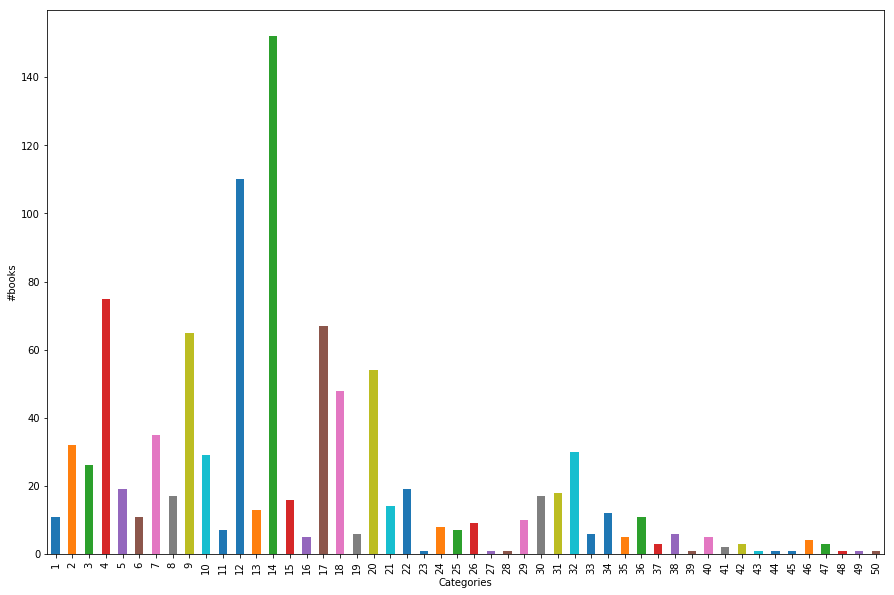

In [345]:
df['# Books'].plot(kind='bar',figsize=(15,10));
plt.ylabel('#books')
plt.xlabel('Categories')

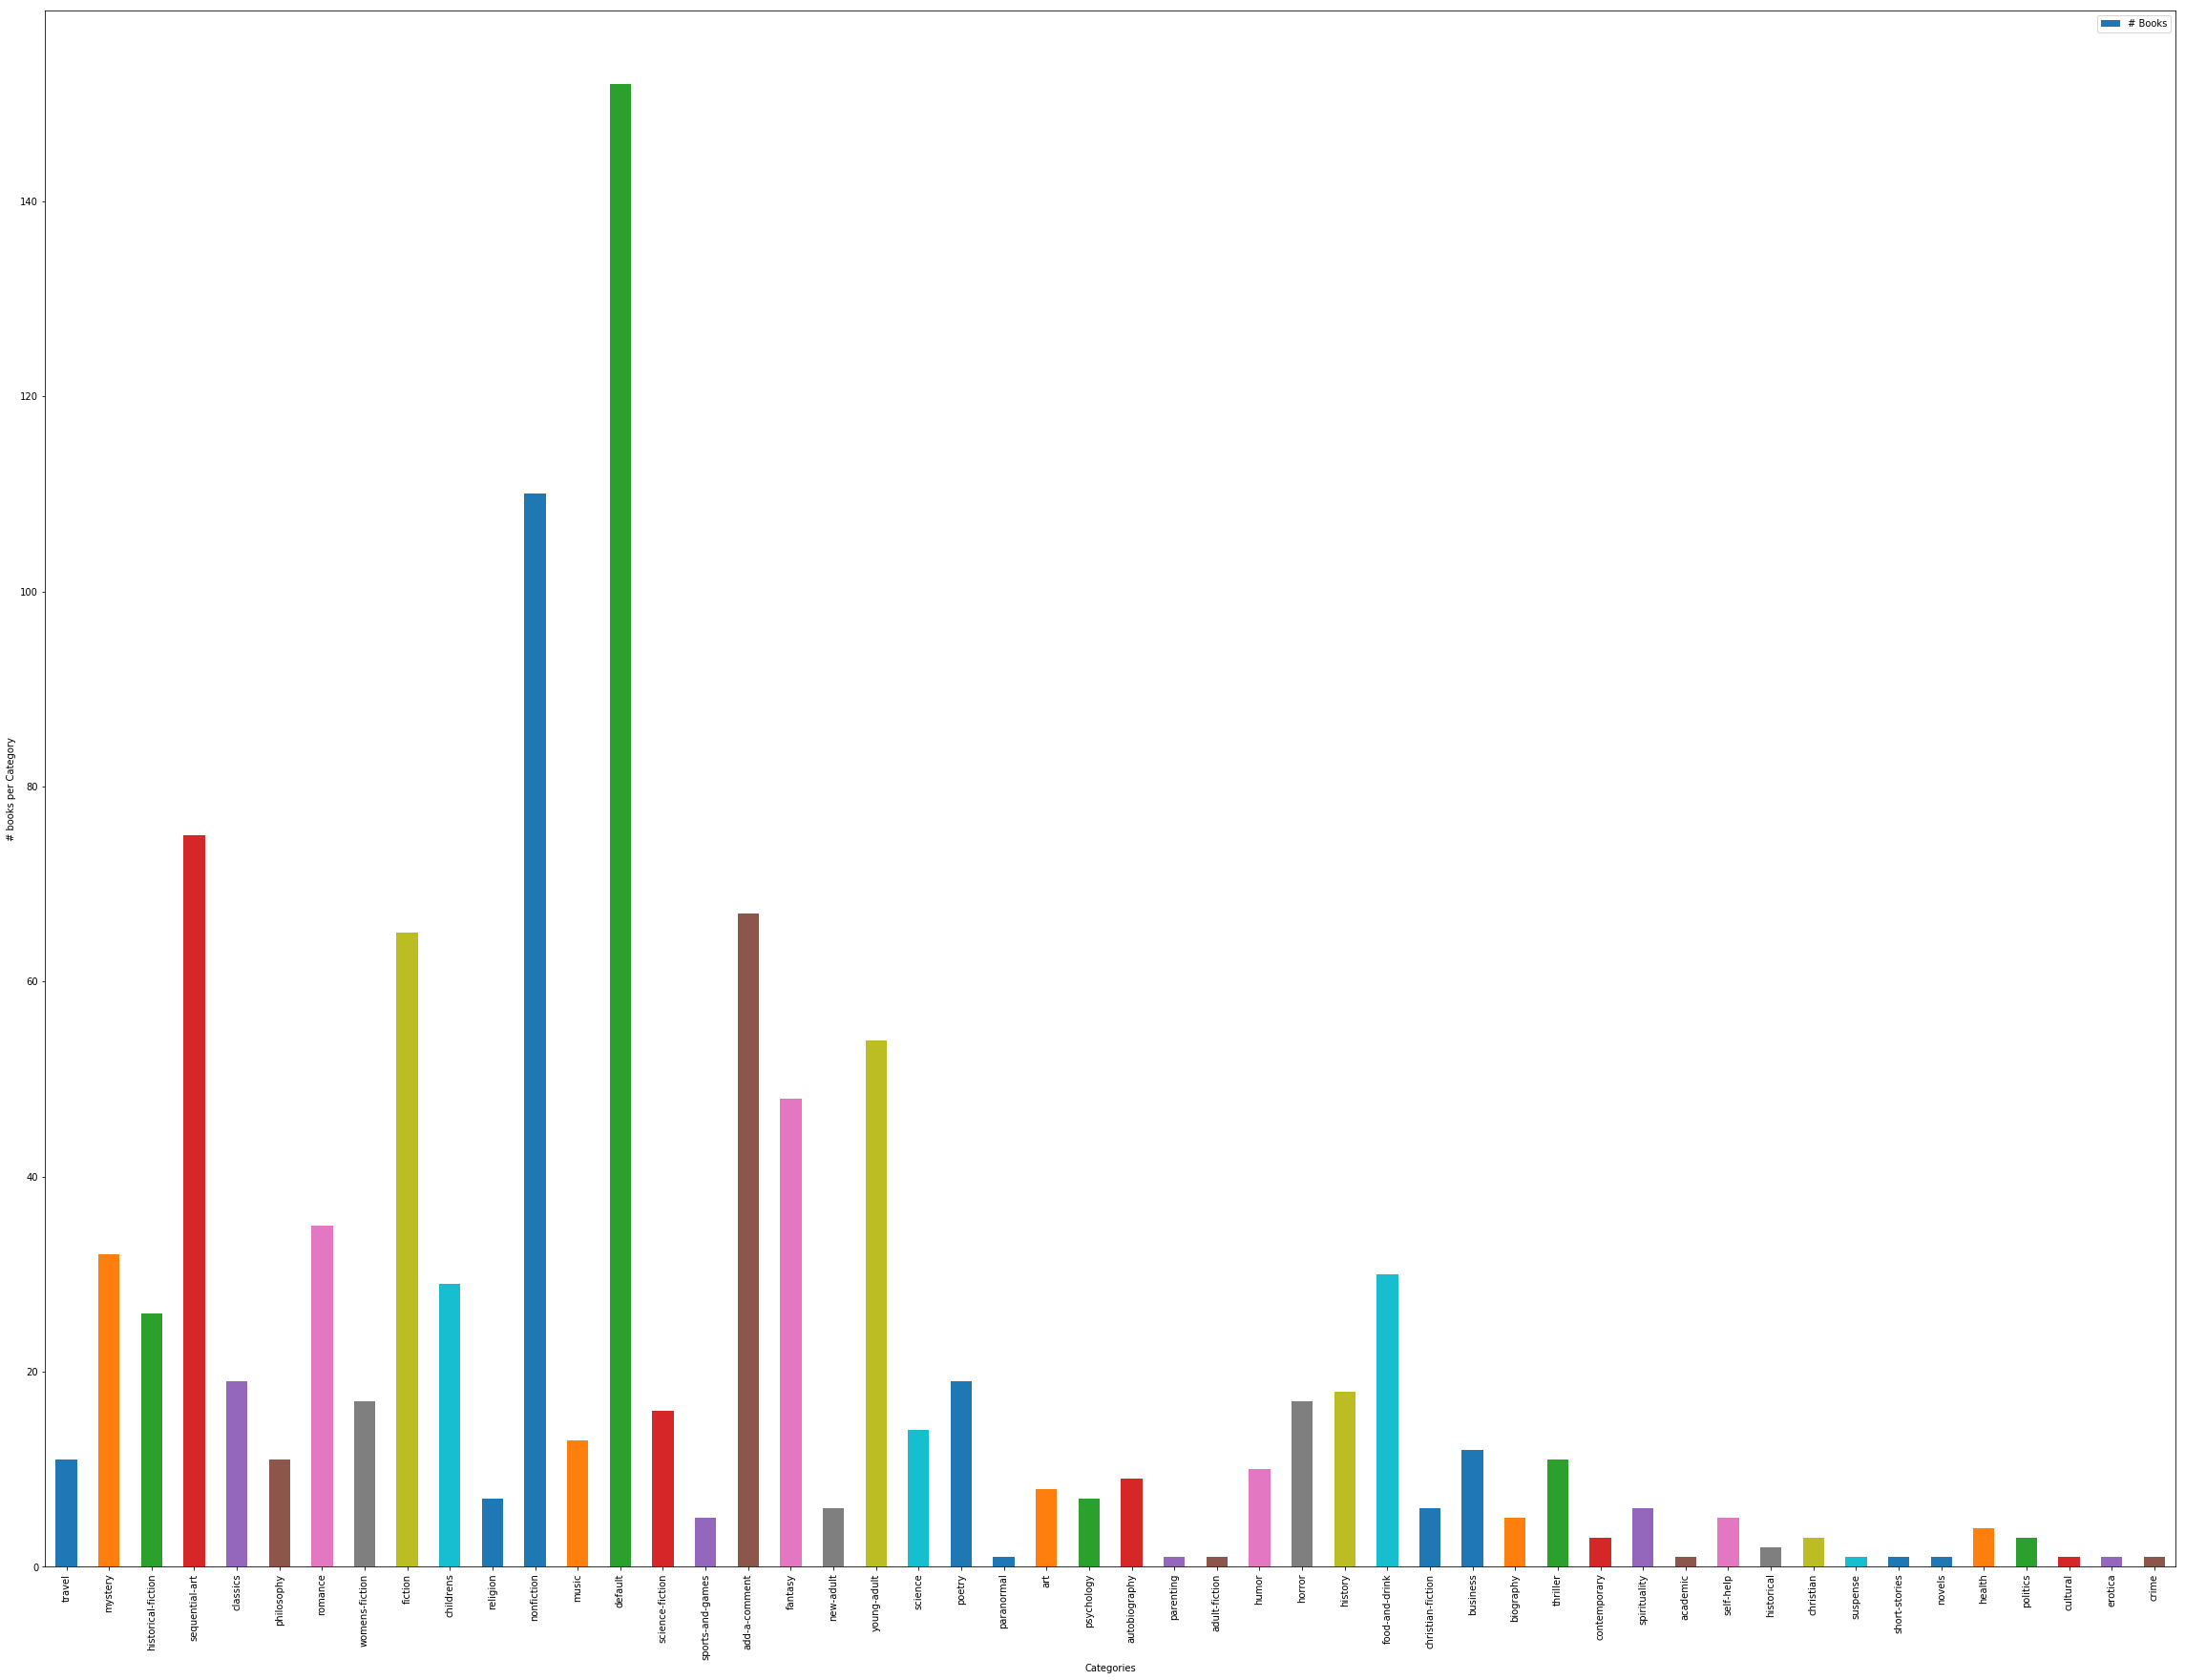

In [350]:
ax = df.plot(kind='bar', x='Category', y='# Books', figsize=(40,30));
ax.set_xlabel('Categories')
ax.set_ylabel('# books per Category')